# PPG Signal Modeling
## Introduction to estimators, linear regresion and bias-variance trade-off

Last updated January 10, 2023

Camilo Andrés Martínez Mejía

## \>>>> Draft lab content
A. Heart rate estimation
1. Data aquicition with the ppg
2. Fitting as a random sample (linear regression).

3. Sistolic amplitud and ratio b/a. What is a good estimate for this values?? confidence interval for this  values!!!
4. coeficients like a random numbers! confidence interval for this  values!!!
5. variance and bias? ----->>>> what happens if we change the degree of the polynomial?
MLE like a linear regression


C. Add random noise: gaussian or electromagnectic sources. (Investigate the causes of noise due to electromagnetic sources)
confidence interval of the polynomial!!!!!

# A.  Data points as a Random samples. Heart rate estimation


## 1. Data Acquisition

We will be acquiring the data using a microcontroller. A microcontroller is a very small general purpose computer good at communicating with electronic sensors. The specific microcontroller we will use is called the Raspberry Pi Pico. Conveniently, it runs Python code with a ligh version of python called MicroPython. 

### Loading firmware onto the microcontroller

Open up Thonny. [Follow the directions here](https://projects.raspberrypi.org/en/projects/getting-started-with-the-pico/3) to install the Micropython firmware on the Pico. [The following page at that link](https://projects.raspberrypi.org/en/projects/getting-started-with-the-pico/4) has directions for testing to make sure it’s working.

Use Thonny’s file manager to transfer `main.py` file and the `max30102` folder to the Pico. You can find these in [this github repository](https://github.com/TheDataScienceLabs/DSLab_Probability). Now, whenever you plug in the pico, it will run main.py. The `max30102` folder is a module that functions as the MAX30102 sensor driver ported to MicroPython, and the `main.py` file has the necessary to connect to the sensor and start reading your pulse when you put your finger on the sensor.

### Heart Rate Sensor

You will collect data today using a **MAX30102 Pulse Oximeter and Heart Rate Sensor**, but you will only use the Heart Rate Sensor. The module MAX30102 consists of two different types of LEDs (Red and IR) and a photodetector. 

|<img src="imgs/MAX30102.png" alt="MAX30102" width="500"/>|
|:--:| 
| *MAX30102 Pulse Oximeter and Heart Rate Sensor* |

The main idea is that the light is emitted by each LED to the skin and the photodetector measures the amount of light reflected. This method of pulse detection through light is called Photoplethysmogram. The reflection of infrared light (IR) changes proportionally to the volume of blood in the artery and is synchronized with the cardiac cycle. Then during the heartbeat the volume of blood will be high and after each heartbeat then will be low. 

"During the systolic phase, the volume of blood in arteries is more; this is because during this phase heart contracts and pushes oxygen-rich blood to all the tissues and organs. The systolic phase causes more light is absorbed by the blood cells. Therefore the amount of light detected by the photode-tector during the systolic phase is low. During the diastolic phase, the blood has flown back into the heart. Therefore, during the diastole phase, the light detected by the photo-detector increases due to a decrease in the blood volume." [3]

|<img src="imgs/PPG_generation_and_waveform_features.jpg" alt="Principle of phototoplethysmogram generation and waveform features" width="300"/>| 
|:--:| 
| *Principle of phototoplethysmogram generation and waveform features* [2]|

The figure above shows that the PPG waveform is obtained by inverting the intensity of the light detected with the photodetector after the light is reflected or transmitted through the human tissue [2]. In the case of our sensor it would be reflected, since MAX30102 is of reflective type.


### Wiring it up

To use the heart rate sensor there are only four pins to connect with our microcontroller: power (VIN), ground (GND), and the two I2C pins (SCL and SDA). 

|<img src="imgs/MAX30102_pins.png" alt="MAX30102_pins" width="500"/>|
|:--:| 
| *MAX30102 pins* |

Unplug your microcontroller from the computer and wire up the MAX30102 sensor according to the following instructions and inspecting the data sheet for the Pico ([pico_datasheet.pdf](https://github.com/TheDataScienceLabs/DSLab_Calculus/blob/main/book/labs/2_determine_heart_rate/pico_datasheet.pdf) - also save this PDF in the main folder you’re using since it’ll continue to be handy throughout this course). Specifically, look for figure 2 on page 4 :

|MAX30102 | Module MAX30102|
| ----------- | ----------- |
|GND|GND|
|SCL|I2C0 SCL or I2C1 SCL|
|SDA|I2C0 SDA or I2C1 SDA|
|VCC|3V3(OUT)|


**Note: If you are uncertain about your wiring, then ask for an instructor to check it over. If you are confident in your wiring you can continue.**


Finally, you will have to modify the lines in the file `main.py` that sets up the I2C bus according to whichever specific SCL and SDA pins you are using – *remember to use the number labeled with GP on the datasheet*.

**IMPORTANT: Please read the code and try to understand what each line of code does. Then you can change the parameters to get the signal and improve the signal acquisition.**

## 2. Pre-processing
With any data set it is always important to do some preprocessing, since errors always occur in the measurement process or the data may be too raw. 

First, we read the data and plot it.

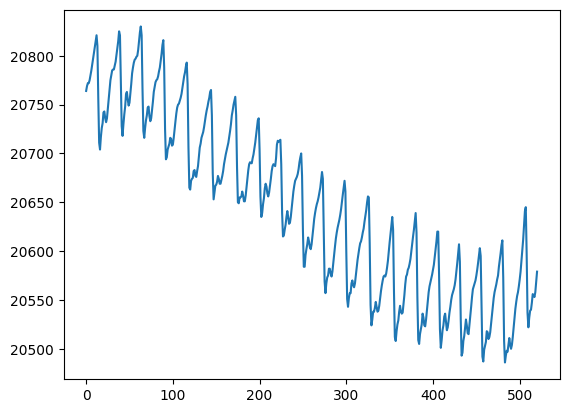

In [133]:
import numpy as np
import matplotlib.pyplot as plt

y = np.loadtxt("example_heartbeat.txt")  # heartbeat data 
y = np.loadtxt("data_ppg.txt") # samplerate 25
#y = np.loadtxt("data_ppg_new.txt")

plt.plot(y)
plt.show()

Note that the x-axis does not represent time directly, only the number of samples used was plotted. We need an array that has the times when each sample was taken.

**Excercise**

Make an array `t` which has the time corresponding to each measurement and plot the signal with the time array you found. You need to find the real sample rate first.

_*Hint: There are two main parameters that affect the data throughput of the sensor itself: `sample rate` and the `averaged samples`. The rate at which that register is fed depends on these two parameters._

Sampling rate: 25
Number of samples: 521
Sampling duration: 20.84


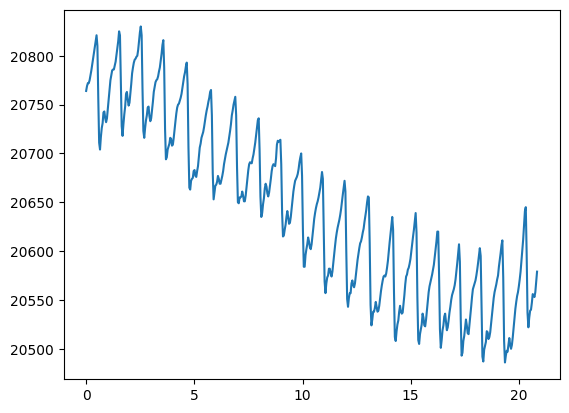

In [98]:
# ENTER YOUR CODE HERE

sampling_rate = 25 # depends of the sample rate and the averaged samples parameters
number_of_samples = len(y) 
sampling_duration = number_of_samples/sampling_rate
print('Sampling rate:', sampling_rate)
print('Number of samples:', number_of_samples)
print('Sampling duration:', sampling_duration)

t = np.linspace(0,sampling_duration,number_of_samples) # ANSWER HERE

plt.plot(t, y)
plt.show()

Now let's zoom in and look at the first 5 seconds.

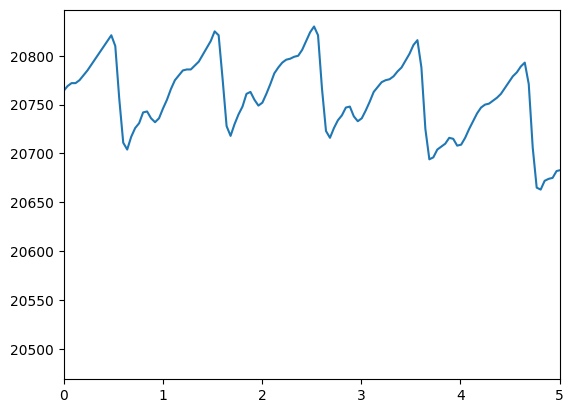

In [99]:
plt.plot(t, y)
plt.xlim(0, 5)
plt.show()

A good practice in data preprocessing is **standardization** or **normalization**. It is not always necessary but in most cases and when using certain statistical models it is essential.

**Excercise**

1. Find out what standardization or normalization is and why it is important and in which cases it is convenient to use each one. 
2. Normalize the data recorded by the sensor and plot them.

\>>>>>>>>> ??? Is it correct if I multiply the signal by -1?  I think so.

In [110]:
yy = -y[:]
ynorm = (yy-min(yy))/(max(yy) - min(yy)) # write here

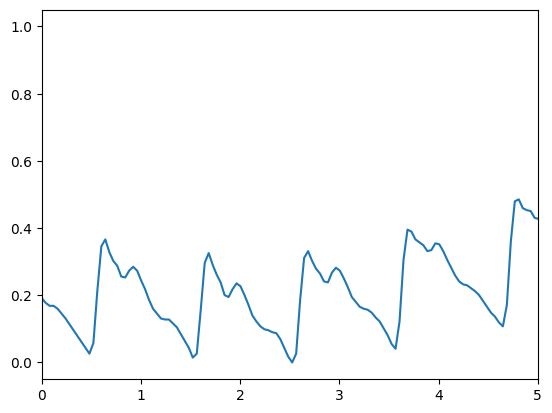

In [112]:
plt.plot(t, ynorm)
plt.xlim(0, 5)
plt.show()

Depending on the value of the `sample_avg` parameter (averaged samples) the signal may appear irregular and not very smooth. This is particularly due to the noise that the sensor has in its circuit, and this introduces some random error. Then, the simplest way to handle random error at this time is by averaging, an this is what do `sample_avg`. 
If we want to make the signal a bit smoother we can use a low-pass filter, in particular we can use a rolling average.

The `rolling_centered_average` function that we will define calculates the average of each point with its `n` nearest neighbors on each side. A rolling average (moving average) can be viewed as an example of a low-pass filter.

In [113]:
# Moving average
# A moving average is a type of convolution and so it can be viewed as an example of a low-pass filter used in signal processing.
def rolling_centered_average(x, n):
    """
    Compute a rolling average of n samples, centered. This fills the outside terms
    where there are not enough neighbors with NaN, to preserve the shape.

    arguments
    ---------
    x: array - the points to be averaged.
    n: int - the number to include in each average.

    returns
    -------
    out: array - the centered rolling averages, with NaN at either end filling our to the
    same shape as x.
    """
    out = np.full_like(x, np.nan)
    out[(n - 1) // 2 : -(n // 2)] = np.convolve(x, np.ones(n), mode="valid") / n
    return out

**Exercise**

Explain in detail what the two lines of code inside the `rolling_centered_average` function do, then use the function with 5 nearest neighbors to each side and plot the result.

Write your answer here!!

The following graph helps you understand what happens when you increase and decrease the size of the window in the rolling average. 

In [114]:
from ipywidgets import interactive

def f(n):
    plt.figure(2)
    averaged = rolling_centered_average(ynorm, n)
    plt.plot(t, averaged)
    plt.xlim(0, 5)
    plt.show()

interactive_plot = interactive(f, n=(2,20))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot



interactive(children=(IntSlider(value=11, description='n', max=20, min=2), Output(layout=Layout(height='400px'…

**Excercise**

Briefly explain what happens when you change the number of elements in the rolling average.Wwhat happens when it increases and when it decreases?

**Exercise**

Select the best number of neighbors to obtain a smoother signal that does not lose the characteristic shape of a ppg signal, and then plot it.

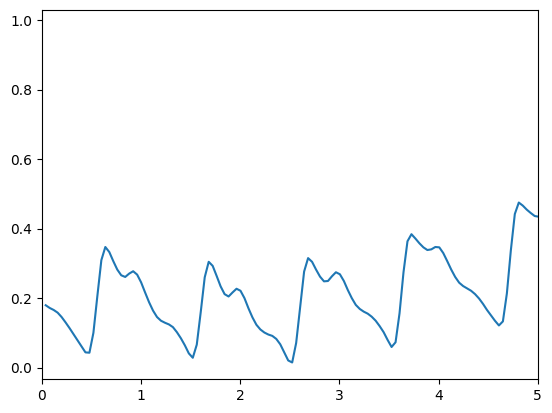

In [115]:
n = 3 # Put the correct number of neighbors here
averaged = rolling_centered_average(ynorm, n)
plt.plot(t, averaged)
plt.xlim(0, 5)
plt.show()

\>>>>>>>>> median filter!!!! repeat everything

## 3. Find the period

Up to this point you will have noticed that the signal is periodic, so it is convenient to find the period and the point that we will consider as the beginning of the function. Then we will use the period to define windows on the signal. 

We need to find the period. One way to do this is to find the time between two consecutive maximum peaks and then average these values, i.e. we need to find local maxima. To do this we will follow the steps below:

1. Identify the points where the function is increasing (where the current value is bigger than the previous)
2. Identify the points where the function is decreasing (hint: use the complement)
3. The maxima are the points where the switch occurs and that they are over a threshold.
4. Define a threshold for the maximums you are looking for.

**You can use the code below as a guide:**

1. Identify the points where the function is increasing (where the current value is bigger than the previous)

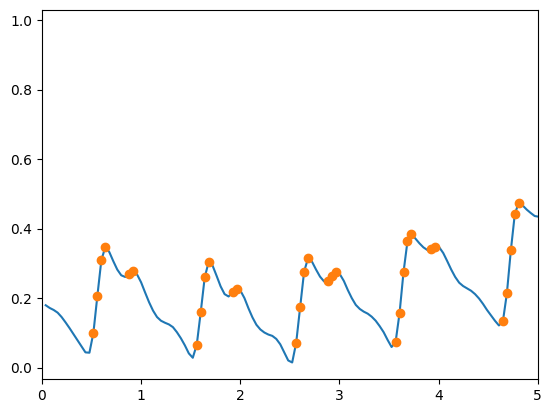

In [119]:
increasing = np.zeros(averaged.shape, dtype=bool)  # this creates an array filled with False

increasing[1:] = averaged[1:] > averaged[:-1]  # using boolean indexing find the points where the function is growing. This yields a list of boleans.

plt.plot(t, averaged)
plt.plot(t[increasing], averaged[increasing], "o")
plt.xlim(0, 5)
plt.show()

2. Identify the points where the function is decreasing (hint: use the complement)


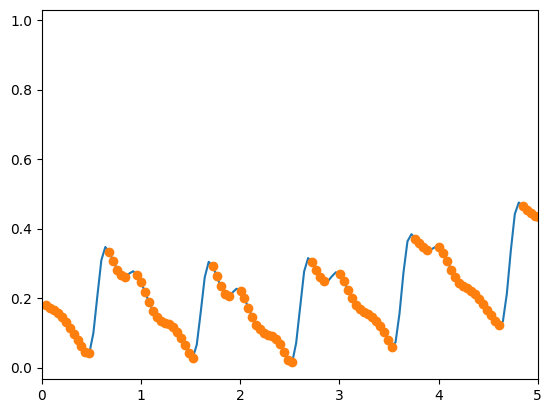

In [120]:
decreasing = ~increasing  # use the complement. This yields a list of boleans.

plt.plot(t, averaged)
plt.plot(t[decreasing], averaged[decreasing], "o")
plt.xlim(0, 5)
plt.show()

3. The maxima are the points where the switch occurs and that they are over a threshold.

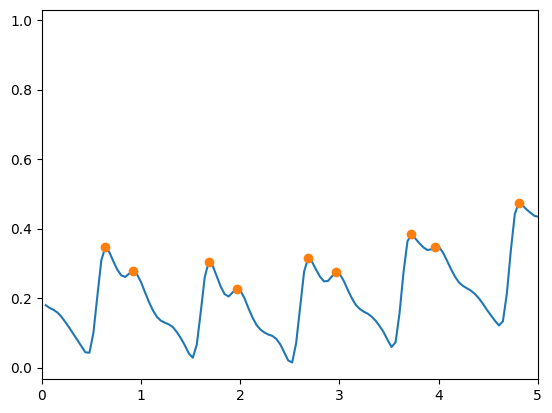

In [121]:
maxsmins = np.zeros(averaged.shape, dtype=bool)  # this creates an array filled with False
maxsmins[:-1] = increasing[:-1] & decreasing[1:]  # Find where the switch occurs. This yields a list of boleans.

plt.plot(t, averaged)
plt.plot(t[maxsmins], averaged[maxsmins], "o")
plt.xlim(0, 5)
plt.show()

**Excercise**

Briefly explain why maximum and minimum points are shown as well as other points that do not seem to agree.

4. Define a threshold for the maximums you are looking for.

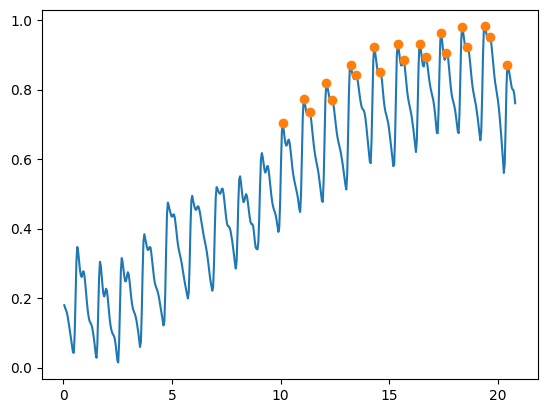

In [122]:
alpha = 1.05  # Select an appropriate valu
peak_indices = maxsmins & (averaged > averaged[maxsmins].mean()*alpha)

plt.plot(t, averaged)
plt.plot(t[peak_indices], averaged[peak_indices], "o")
plt.show()

Now we can choose the point where the shape of the typical ppg signal begins. One way to find such points is to define the indices of the maximum points and set back an index on the indices of the critical points.

In [123]:
idx_maxsmins = np.where(maxsmins == True)[0]  # 
idx_maxsmins

array([ 16,  23,  42,  49,  67,  74,  93,  99, 120, 127, 148, 155, 176,
       182, 203, 210, 228, 234, 252, 259, 276, 283, 302, 309, 330, 336,
       357, 364, 384, 391, 410, 416, 434, 440, 458, 464, 484, 490, 510],
      dtype=int64)

In [124]:
idx_maxima = np.where(peak_indices == True)[0]
idx_maxima

array([252, 276, 283, 302, 309, 330, 336, 357, 364, 384, 391, 410, 416,
       434, 440, 458, 464, 484, 490, 510], dtype=int64)

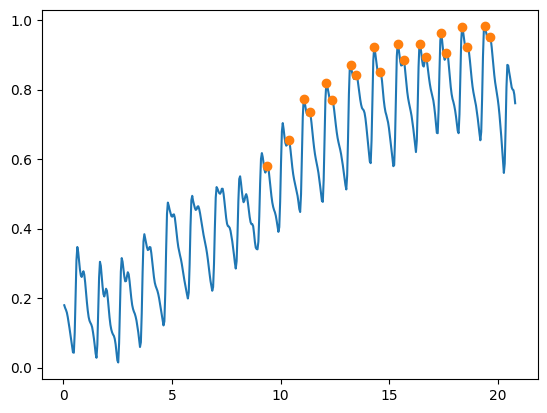

In [125]:
points = np.zeros(averaged.shape, dtype=bool)
for idxmax in idx_maxima:
    points[idx_maxsmins[np.where(idx_maxsmins == idxmax)[0][0] - 1]] = True
    
plt.plot(t, averaged)
plt.plot(t[points], averaged[points], "o")
plt.show()

Finally, to find the period we can average over the distances between consecutive maximum peaks or over the consecutive distances of the previously found points, verifying that the initial and final points comply with the periodicity conditions.

In [126]:
np.diff(t[peak_indices])

array([0.96184615, 0.28053846, 0.76146154, 0.28053846, 0.84161538,
       0.24046154, 0.84161538, 0.28053846, 0.80153846, 0.28053846,
       0.76146154, 0.24046154, 0.72138462, 0.24046154, 0.72138462,
       0.24046154, 0.80153846, 0.24046154, 0.80153846])

In [127]:
np.mean(np.diff(t[peak_indices]))

0.5442024291497977

Now we can choose the start of the signal by selecting the appropriate point in the `in_points` list, which is defined by the list `t` and the Bboolean list `points`

In [128]:
in_points = t[points]
start_time = in_points[0]
start_time

9.378

**Excercise**

Use the above code to make a function to obtain the period of the signal. Inputs: the measured heartbeat signal and the times when the signal was measured. Returns period and the error

In [129]:
def get_period(heartbeat, t):
    """
    Given a hearbeat signal, what is the period of the heart beat?

    Arguments
    ---------
    heartbeat: array - the measured heartbeat signal
    time: array - the times when the signal was measured. Should be the same
        shape as heartbeat.

    Returns
    -------
    period: float - the average period of the heartbeat signal.
    error: float - an estimate of the error in the measurement of the period.
    """

    # block of code which averages the function and finds where the function is increasing and decreasing.
    averaged = rolling_centered_average(heartbeat, 10) # 
    increasing = np.zeros(averaged.shape, dtype=bool)  # this creates an array filled with False
    increasing[1:] = averaged[1:] > averaged[:-1]
    decreasing = ~increasing

    maxima = np.zeros(averaged.shape, dtype=bool)
    maxima[:-1] = increasing[:-1] & decreasing[1:]
    alpha = 1.05
    peak_indices = maxima & (averaged > averaged[maxima].mean()*alpha)
    peak_times = t[peak_indices]
    gaps = np.diff(peak_times)
    return gaps.mean(), gaps.std(ddof=1) / np.sqrt(len(gaps))

In [130]:
period, error = get_period(y, t)
print('period:', period,'\t', 'error: ', error)

#period = np.diff(t[points])[0]
#period

period: nan 	 error:  nan


C:\Users\kmi10\AppData\Local\Temp\ipykernel_9824\4065144923.py:29: RuntimeWarning: Mean of empty slice.
  return gaps.mean(), gaps.std(ddof=1) / np.sqrt(len(gaps))
C:\Users\kmi10\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\kmi10\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\kmi10\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\kmi10\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


\>>>>>>>>>>>  compute frecuency : heart rate. list of heart rates and make: histogran meaan, variance, .... look writing notes of profesor Mimi

## 3. Polynomial fitting and windowing

We have collected data taking into account a sampling rate, so we discretized our signal and obtained a finite set of points that represents our signal or function. Now we need to find a way to find a fuction that best fits the data and allow us to predict values from a continuos interval. For this task we can use interpolation, but we will work with an approximation from **linear regression by fitting a polynomial**.

The rolling average technique used above works very well for identifying the locations of large features. Unfortunately, it blurs out some of the fine detail, brings peaks down, and lifts bottoms up. That’s no good if you want to know information like the amplitude or shape of the signal. We can do much better, and for this we will use linear regression.

Once the period and starting point have been defined, we can select a window that will allow us to define our periodic signal. i.e. we can extract just one cycle of the initial signal. 

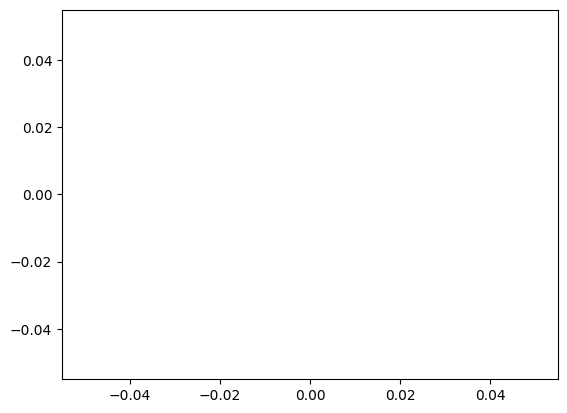

In [131]:
start_time = in_points[0]
mask = (t >= start_time) & (t < start_time + period)
cycle = y[mask]
cycle_t = t[mask]

plt.plot(cycle_t, cycle)
plt.show()

Numpy has a built in tool which finds a polynomial which matches observed values closely. This uses least squares to fit the data, this concept will be explained later. Here is how it works:

In [98]:
from numpy.polynomial import Polynomial

polynom = Polynomial.fit(cycle_t, cycle, deg= 5)
print(polynom)

42572.690726114495 + 2435.8301530608455 x**1 + 10165.725729834856 x**2 -
22487.811374319546 x**3 - 10147.252453859219 x**4 +
21964.508762124184 x**5


The object `polynom` represents a list of coefficients of a polynomial. We can also call it as a function. Let's use that to show how well it lines up with the data we measured:

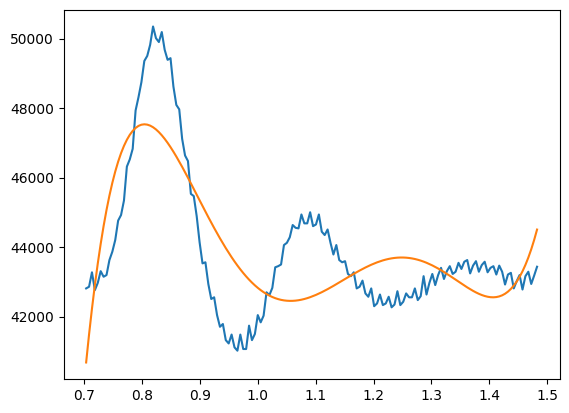

In [99]:
plt.plot(cycle_t, cycle)
plt.plot(cycle_t, polynom(cycle_t))
plt.show()

In [100]:
from ipywidgets import interactive

def f2(n):
    plt.figure(2)
    polynom = Polynomial.fit(cycle_t, cycle, deg= n)
    plt.plot(cycle_t, cycle)
    plt.plot(cycle_t, polynom(cycle_t))
    plt.show()

interactive_plot = interactive(f2, n=(1,50))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(IntSlider(value=25, description='n', max=50, min=1), Output(layout=Layout(height='400px'…

**Excercise**

Briefly explain what happens when you increase or decrease the degree of the polynomial.

You may wonder how to choose the correct degree of the polynomial. A parabola has one local maximum or minimum. A cubic polynomial has at most two. A fourth degree polynomial has at most three local maxima and minima.

Did you find the pattern? There is an empirical criterion which consists in choosing a polynomial of degree one more than the number of local maxima and minima.

**Excercise**

Fit a polynomial of degree one more than the number of local maxima and minima of the selected signal cycle.

In [113]:
polynom = Polynomial.fit(cycle_t, cycle, deg= 9)
print(polynom)

44389.86246210763 + 2751.7680986599153 x**1 - 45221.32552765825 x**2 -
5475.124893368976 x**3 + 258861.08123439364 x**4 -
101193.90313992876 x**5 - 422794.49794939766 x**6 +
233451.2024780196 x**7 + 209072.26994569678 x**8 - 130183.21014321361 x**9


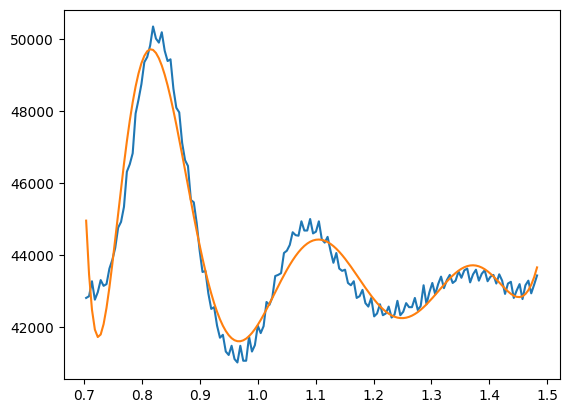

In [114]:
plt.plot(cycle_t, cycle)
plt.plot(cycle_t, polynom(cycle_t))
plt.show()

Note that from a certain point, the polynomial can snake through each point we give it, capturing all the noise. *That defeats the purpose of the fit!*. Therefore, It is good practice to choose as low a degree as possible while still matching the data well. This is called the *parsimony principle*. 

We can quantify how good our regression is, how good our polynomial is, using the **mean square (MSE)**. This is the average value of the difference between the predicted value and the measured value. If the measured values are $y_i$ and we are measuring how well a polynomial or function $f(x_i)$ agrees, then the mean square error is given by the formula
$$\frac{1}{n}\sum_{i=0}^n \left(f(x_i)-y_i\right)^2$$

**Exercise**

Write a function which takes an polynomial and returns the mean square error. 

In [103]:
def mean_square_error(x, y, poly):
    # put your answer here!
    mse = sum((poly(x)-y)**2)/len(x)
    return mse

The next code uses the code you wrote to make a plot of how the polynomial degree relates to the mean square error.

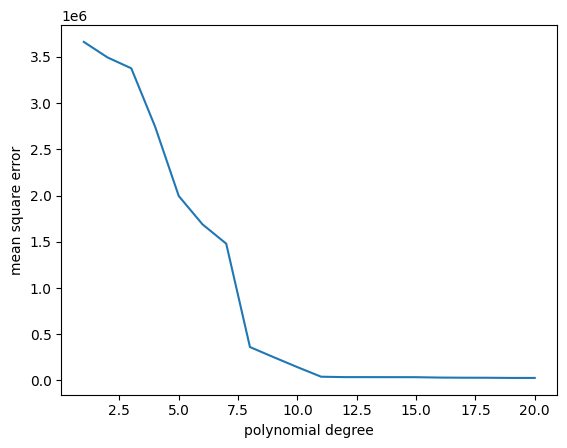

In [104]:
degrees = np.arange(1,21)
errors = []
for deg in degrees:
    poly = Polynomial.fit(cycle_t, cycle, deg=deg)
    errors.append(mean_square_error(cycle_t, cycle, poly))
    
plt.plot(degrees, errors)
plt.xlabel("polynomial degree")
plt.ylabel("mean square error")
plt.show()

**Exercise**

Interpret the plot above. After what point do we see diminishing returns on the model’s fit? What is the smallest degree of polynomial which has a reasonably low mean square error, in your opinion?

We can make a windowing using the period and select each complete cycle as a window.

number of windows:  6


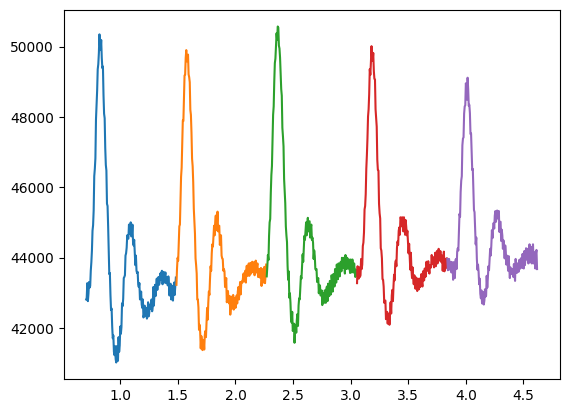

In [105]:
windows = []
nwindows = int(sampling_duration/period) # number of periods

print('number of windows: ', nwindows)

for k in range(nwindows-1):
    mask = (t >= start_time + period*k) & (t < start_time + period*(1+k))
    ywindow = y[mask]
    twindow = t[mask]
    windows.append((twindow, ywindow))
    
for w in windows:
    plt.plot(w[0], w[1])
plt.show()

If we fit a polynomial to each window, we will see that **the coefficients of the polynomials are random**.

Let's take a look through a radar plot, but first let's fit a polynomial to each window and store these coefficients in a list.


In [106]:
polyCoefList = []

poly_deg = 8

for w in windows:
    coef_poly = list(Polynomial.fit(w[0], w[1], deg= poly_deg))
    print(coef_poly)
    polyCoefList.append(coef_poly)
    
polyCoefList = np.array(polyCoefList)
polyCoefList

[44389.86246210768, 6288.256819512014, -45221.32552765864, -56740.501485671186, 258861.0812343949, 96405.35543217663, -422794.49794939946, -45520.33251994394, 209072.2699456977]
[44535.0463321424, -104.84137726957975, -37318.87846183188, 8010.089304208897, 181858.7903345344, -44190.44808851416, -257397.24390125254, 37915.17060693056, 111762.47843916784]
[44691.02753130279, 1715.9496813952446, -38205.72137143532, -9322.212792441182, 192735.70777260198, -9866.575960044027, -278616.846493117, 18806.41189991106, 122987.38869922188]
[44662.834135707046, 6319.2130033991225, -32394.594262124094, -60442.59157112413, 195681.71012692995, 111100.03159905912, -328396.55413350184, -56910.68050025631, 165257.58254451078]
[43997.94206670284, 5177.924321937757, 2054.888825933577, -62085.905137076465, 29535.454360535976, 133078.00377017644, -82974.57946570328, -77417.955720973, 52130.639824872196]


array([[ 4.43898625e+04,  6.28825682e+03, -4.52213255e+04,
        -5.67405015e+04,  2.58861081e+05,  9.64053554e+04,
        -4.22794498e+05, -4.55203325e+04,  2.09072270e+05],
       [ 4.45350463e+04, -1.04841377e+02, -3.73188785e+04,
         8.01008930e+03,  1.81858790e+05, -4.41904481e+04,
        -2.57397244e+05,  3.79151706e+04,  1.11762478e+05],
       [ 4.46910275e+04,  1.71594968e+03, -3.82057214e+04,
        -9.32221279e+03,  1.92735708e+05, -9.86657596e+03,
        -2.78616846e+05,  1.88064119e+04,  1.22987389e+05],
       [ 4.46628341e+04,  6.31921300e+03, -3.23945943e+04,
        -6.04425916e+04,  1.95681710e+05,  1.11100032e+05,
        -3.28396554e+05, -5.69106805e+04,  1.65257583e+05],
       [ 4.39979421e+04,  5.17792432e+03,  2.05488883e+03,
        -6.20859051e+04,  2.95354544e+04,  1.33078004e+05,
        -8.29745795e+04, -7.74179557e+04,  5.21306398e+04]])

**Introduction to plotly**

... task pending!

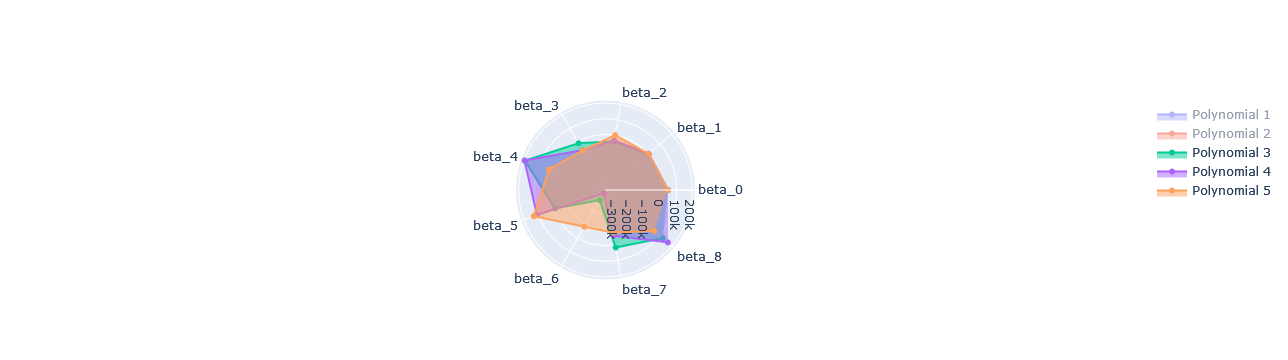

In [107]:
import plotly.graph_objects as go

categories = [f'beta_{n}' for n in range(poly_deg+1)]


fig = go.Figure()


for count, coeflist in enumerate(polyCoefList, start=1):
    fig.add_trace(go.Scatterpolar(
          r=coeflist,
          theta=categories,
          fill='toself',
          name=f'Polynomial {count}'
    ))

#data_norm = (coeflist - np.min(coeflist))/ (np.max(coeflist)- np.min(coeflist))
    
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True
)

fig.show()

**Introduction to pandas**

... task pending!


In [108]:
import pandas as pd
coef_df = pd.DataFrame(polyCoefList, columns=categories)

In [109]:
coef_df.describe()

,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,44455.342506,3879.300490,-30217.126159,-36116.224336,171734.548766,57305.273351,-274035.944389,-24625.477247,132242.071891
std,282.159399,2915.310475,18611.843383,33002.302502,85042.093392,79021.576040,124384.946169,50158.839546,58982.640949
min,43997.942067,-104.841377,-45221.325528,-62085.905137,29535.454361,-44190.448089,-422794.497949,-77417.955721,52130.639825
25%,44389.862462,1715.949681,-38205.721371,-60442.591571,181858.790335,-9866.575960,-328396.554134,-56910.680500,111762.478439
50%,44535.046332,5177.924322,-37318.878462,-56740.501486,192735.707773,96405.355432,-278616.846493,-45520.332520,122987.388699
75%,44662.834136,6288.256820,-32394.594262,-9322.212792,195681.710127,111100.031599,-257397.243901,18806.411900,165257.582545
max,44691.027531,6319.213003,2054.888826,8010.089304,258861.081234,133078.003770,-82974.579466,37915.170607,209072.269946


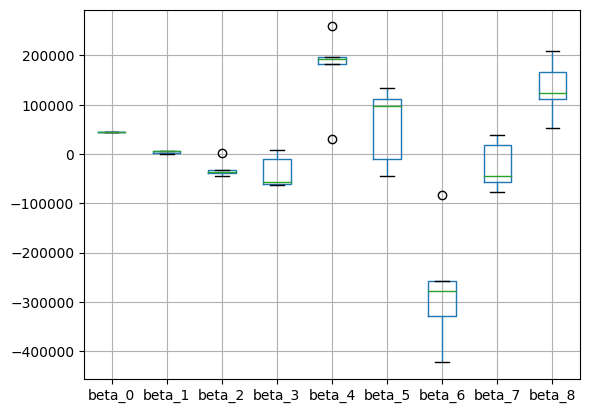

In [110]:
coef_df.boxplot();

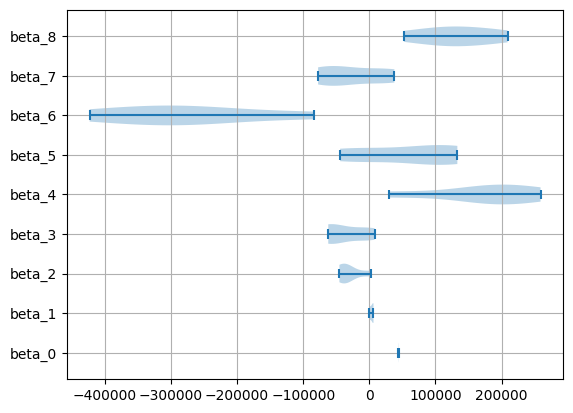

In [111]:
plt.violinplot(polyCoefList, positions=range(len(categories)), vert=False);
plt.grid()
plt.yticks(np.arange(len(categories)), categories)
plt.show()

**Excercise**

What do you think is a good value to estimate the coefficients? maybe the mean, the median, ...? Explain briefly and estimate the value of each coefficient in order to define a polynomial that defines the signal in a period.

### Confidence intervals of the different polynomials

In [112]:
polys = []

for w in windows:
    poly_temp = Polynomial.fit(w[0], w[1], deg= 8)
    polys.append(poly_temp)

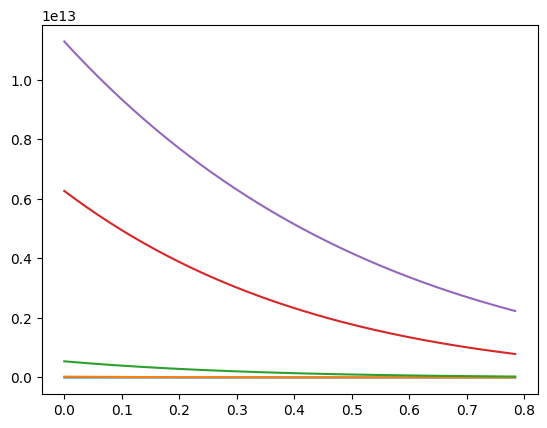

In [77]:
tdomain = np.linspace(0,period, 200)
    
for pol in polys:
    plt.plot(tdomain, pol(tdomain))
plt.show()

## 4. Exploring the data and brief interpretation of the PPG signal

... task pending!

Explain the systolic_amplitude and calculate it par, say explicitly: note that the systolic_amplitude is a random number.
Explain the systolic_amplitude and ask students to calculate it for the different windows, explicitly state that: note that systolic_amplitude is a random number.

plots!

... task pending!

Explain the b/a ratio and ask students to calculate it for the different windows, explicitly state that: note that the b/a ratio is a random number.

plots!

## 5.

### Introduction to linear regression (Fitting as a random sample)

For this task we will use polynomial regression, but first we need to know about the linear model, particularly linear regression. There are different methods to fit the linear model to a set of training data, but the most popular is the least squares. This will be explained later.

Before we discuss linear regression in more deapth, it is worthwhile to review a little about estimators


### Estimators

An estimator is a random variable $\hat{\theta}$ that can be viewed as a function of $X$, where $X=(X_1, X_2, ..., X_n)$ are given observations, i.e. we can write $\hat{\theta}=g(X)$. Since the distribution of $X$ depends on $\theta$ then the same is true for the distribution of $\hat{\theta}$. Furthermore, we can say that $\hat{\theta}$ is an estimator of an unknown parameter $\theta$.

It is important to note that the mean and variance of an estimator are defined in the usual way, and we can denote them as $E_{\theta}\left[\hat{\theta}\right]$ and $var_{\theta}\left[\hat{\theta}\right]$ respectively. Note that the subscript indicates that they are functions of $\theta$, but for simplicity this can be omitted from the notation without clearly forgetting this dependence.

When working with estimators, some basic concepts should be made clear:

- **Estimation error $(\,\tilde{\theta}\,)$ :** $\tilde{\theta} = \hat{\theta} - \theta$.
- **Bias $(b(\hat{\theta}))$ :** The bias is the expected value of the estimation error. So, $b(\hat{\theta})=E[\hat{\theta}] - \theta$. 
- **Unbiased:** An estimator is unbiased if its expected value is the value to be estimate, for all possible values of $\theta$, i.e. $E[\hat{\theta}]=\theta$ , and $b(\hat{\theta})$ will be $0$.

There are other concepts a little more advanced, but so far these are the most important ones.

Generally, we are interested in the size of the estimation error. We need some way of knowing how large or small the error is, and this is where the concept of **mean square error (MSE)** comes in. We use the concepts of bias and variance, and we define the MSE as:
$$E\left[\tilde{\theta}^2\right] = b^2\left(\hat{\theta}\right) + var\left[\hat{\theta}\right]$$

The MSE formula shows a trade-off between the terms that correspond to bias and variance. This trade-off is quite important because it occurs in many statistical, probabilistic and machine learning problems. This trade-off means that if, for example, the variance decreases, there have be an increase in the bias.

**Note.** A good estimator is one that keeps variance and bias as low as possible.

### Linear Regression

The linear  regression is a classic, simple, interpretable and quite important model in statistics and machine learning. This methodology allow us to build a model of the relation between two or more variables of interest from a set of available data.

With just two variables, it is natural to attempt to build a linear model of the form

$$y \approx \beta_0 + \beta_1x$$ or
$$y = \beta_0 + \beta_1x + \epsilon,$$

where $\beta_0$ and $\beta_1$ are parameters or coefficients to be estimated, and $\epsilon$ is an random error, with mean zero, associated with the estimation.

Now, given two estimators $\hat{\beta}_0$ and $\hat{\beta}_1$ of the respective parameters, we have the model

$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1x_i,$$

which predicts the value $y_i$ corresponding to $x_i$.

Note that $\hat{y}_i$ will be generally different from $y_i$, and it is common to call the difference 

$$\tilde{y}_i = y_i - \hat{y}_i$$

the ith **residual**.

The selecction of the best estimators of the parameters will result from the reduction of the residuals. In particular, we will seek to choose parameters $\hat{\beta}_0$ and $\hat{\beta}_1$
such that they minimize the sum of the squared residuals, that is, we need to minimize

$$
\sum_{i=1}^{n} \left(y_i - \tilde{y}_i \right)^2 = \sum_{i=1}^{n}\left(y_i - \hat{\beta}_0 - \hat{\beta}_1x_i\right)^2.
$$

This estimation method is know as **Least Squares**.

**\>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> imagen!**

I you want to derivate the **formulas for the linear regression**, we set to zero the partial derivatives of the sum of the squared residuals with respect to $\hat{\beta}_0$ and $\hat{\beta}_1$, then you obtain two linear equations which can be solved explicitly. After some algebra yo will get

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^{n}\left(x_i - \bar{x} \right)\left(y_i - \bar{y} \right)}{\sum_{i=1}^{n} \left(x_i - \bar{x} \right)^2}
$$
$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x} 
$$
where $\bar{x}$ and $\bar{y}$ are the means, i.e.
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i, \,
\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i.
$$

#### Questions and exercises
* derivate the formulas for the linear regression
* Assume the simple linear regression model $$y = E(y|x) = \beta_0 + \beta_1x + \epsilon.$$  In this model, the linear relationship tells us that for each increase $k$ in the value of $x$, the conditional expectation of $y$ increases by $\beta_1k$ plus a random error. 
Show this in mathematical terms using equations.

### Multiple linear Regression

In mathematics it is great to generalize. So it's nice to know what happens when you deal with more than two variables (**multiple linear regression**).

If we have a vector of inputs $X^T = (X_1,X_2,...,X_p)$, and the idea is that we want to predict a real-valued output $Y$. Then, the linear regression model has the form

$$
f(X) = \beta_0 + \sum_{j=1}^{p}X_j\beta_j.
$$

As in the simplified model, the $\beta's$ are unknown parameters or coefficients. The term  $\beta_0$ is commonly called bias.

We use the **least squares method to minimize the residual sum of squares (RSS)**. In order to minimize, we rewrite the RSS

$$
RSS(\beta) = \sum_{i=1}^{N} \left(y_i - f(x_i) \right)^2 \\
RSS(\beta) = (y - X\beta)^T(y-X\beta)
$$

Where $X$ is the $N \times (p+1)$ matrix with input vectors in the rows (with a 1 in the first position of each row) and $y$ is the N-vector of outputs.
If we minimize with respect to $\beta$, and we take into consideration some details, we obtain that the unique solution is

$$
\hat{\beta} = (X^T X)^{-1}X^T y.
$$

Therefore, the fitted values at the training inputs are

$$
\hat{y} = X\hat{\beta} = X(X^T X)^{-1}X^T y.
$$

**\>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> imagen!**

It is important to clarify that the linear model is linear in the parameters no matter the source of the $X_j$. Therefore, the linear methods can be applied to transformations of the inputs and this expands their scope. For example towards polynomial regressions or regressions using logarithmic transformations.

Another important aspect to mention, in order to handle inferences later on about the parameters or the model, is that we assume that

$$f(X) = \beta_0 + \sum_{j=1}^{p}X_j\beta_j$$ 

is the correct model for the mean, so that the conditinal expectation of $Y$ is linear in $X_1, X_2, ..., Xp$. Therefore,

$$
Y = E(Y|X_1,X_2,...,X_p) + \epsilon \\
Y = \beta_0 + \sum_{j=1}^{p}X_j\beta_j + \epsilon.
$$

where $\epsilon \sim N(0, \sigma^2)$, i.e. the error is a Gaussian random variable with zero mean and variance $\sigma^2$

#### Questions and exercises
* derivate the $\beta$ parameter in the multiple linear regression

### Polynomial regression

Polynomial regression can be considered as a special case of multiple linear regression. This methodology allow us to build a model of the relation between the independent variable and the dependent variable, conditional expected value of $y$, which can be modeled as an nth-degree polynomial. 
$$y = E(y|x) = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + ... + \beta_nx^n + \epsilon.$$

Polynomial regression fits a nonlinear model to the data, but as a statistical estimation problem is linear in the sense that the regression function $E(y | x)$ is linear in the parameters.

$$f(X) = \beta_0 + \sum_{j=1}^{n}X_j\beta_j$$ 

In this case the variables $X_j$ come from basis expasions, such as $X_1 = x, X_2 = {x}^2, X_3 = {x}^3, \,etc.$ 




#### Questions and exercises
1. Why Polynomial regression can be considered as a special case of multiple linear regression?
2. Suppose we have a problem that can be modeled as a quadratic model, so we can write
$$y = E(y|x) = \beta_0 + \beta_1x + \beta_2x^2 + \epsilon.$$  
 - In this model, when we increase $x$ by one unit, the conditional expectation of $y$ increases by $\beta_1 + \beta_2(2x +1)$ units. Show this.
 - For infinitesimal changes in $x$, the variation in $y$ is given by? anws: the total derivative with respect to x
 - What makes the relationship between $x$ and $y$ non-linear even though the model is linear in the parameters to be estimated? answ: The fact that the change in $y$ depends on $x$.
3. Show that the relationship between $x$ and $y$ in the polonomial regression is nolinear.
4. Show that the relationship between the parameters to be estimated in the polonomial regression is linear.


### Polynomial interpolation

A function which interpolates is called an "interpolant".

Since you have the period of your heartbeat signal, you can extract just one cycle of the initial signal. In the following cell, fill in a start time which gives you a good window capturing one full heart beat.

We have collected data taking into account a sampling rate, so we discretized our signal and obtained a finite set of points that represents our signal or function. Now we need to find a way to approximate values of our signal that are between the different samples, this process is called interpolation. There are different interpolation techniques, but this time we will work with polynomial interpolation, which is a generalization of linear interpolation.

## References
1. Elgendi M. On the analysis of fingertip photoplethysmogram signals. Curr Cardiol Rev. 2012 Feb;8(1):14-25. doi: 10.2174/157340312801215782.

2. Junyung Park, Hyeon Seok Seok, Sang-Su Kim1 and Hangsik Shin. Photoplethysmogram Analysis and Applications: An Integrative Review. Front. Physiol., 01 March 2022. Sec. Vascular Physiology. https://doi.org/10.3389/fphys.2021.808451. 

3. Pankaj, Kumar, A., Komaragiri, R. et al. A Review on Computation Methods Used in Photoplethysmography Signal Analysis for Heart Rate Estimation. Arch Computat Methods Eng 29, 921–940 (2022). https://doi.org/10.1007/s11831-021-09597-4